> Zaproponuj klasę reprezentującą strukturę danych, która w konstruktorze dostaje tablicę liczb naturalnych o długości $ n $ o zakresie wartosći $ [0, k] $. Ma ona posiadać meodę:

    count_num_in_range(a, b)
    
> Metoda ta ma zwracać informację o tym, ile liczb w zakresie $ [a, b] $ było w tablicy. Metoda ma działać w czasie $ O(1) $. Można założyć, że zawsze $ a \ge 1, b \le k $.

### Opis algorytmu

Algorytm jest bardzo prosty i korzysta z tego, co wiemy na temat Counting Sorta. Ponieważ samo zwracanie liczby elementów we wskazanym przedziale ma się odbywać w stałym czasie, ale tworzenie instacji klasy już nie musi, w konstruktorze wywołujemy metodę, która przeprowadza zliczanie wartości w sposób identyczny do Counting Sorta, ale ich nie sortuje. W zaktualizowanej tablicy $ counts $ finalnie pod każdym z indeksów znajduje się liczba elementów, których wartość jest mniejsza lub równa wartości równej temu indeksowi. W ten sposób łatwo obliczymy liczbę elementów w przedziale jako różnicę między liczbą elementów nie większych niż $ b $ oraz elementów mniejszych niż $ a $, czyli nie większych niż $ a-1 $ (bo operujemy na liczbach naturalnych).

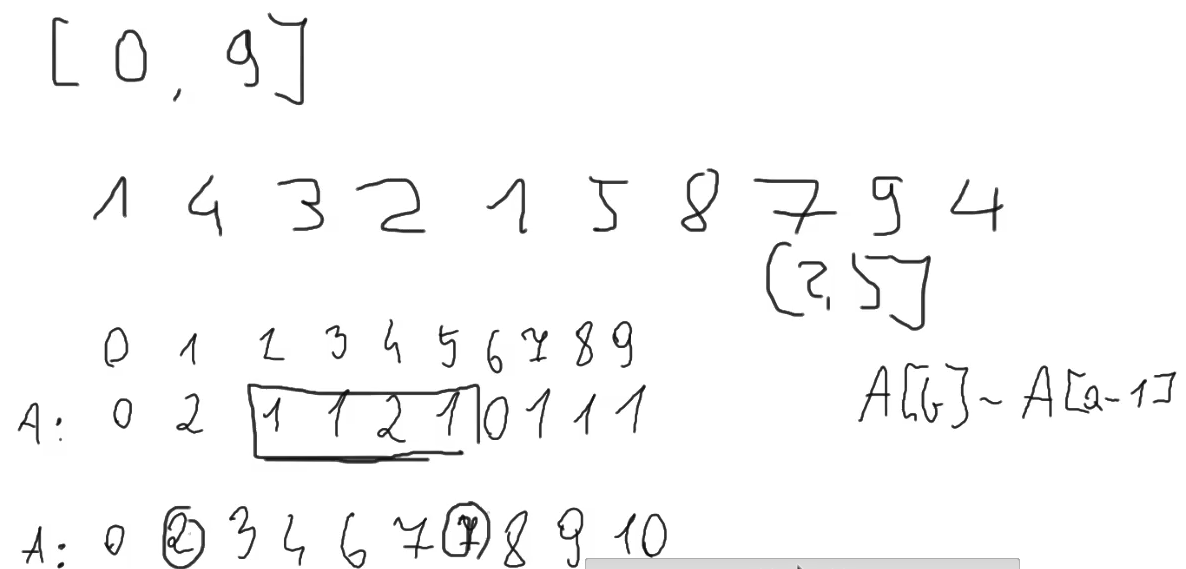

W poniższym przykładzie nie wykorzystujemy założenia (robimy rozwiązanie bardziej ogólne).

### Implementacja algorytmu

In [1]:
class FancyName:
    def __init__(self, values, k):
        self.values = values
        self.counts = [0] * (k + 1)
        self._count_values()
    
    def count_num_in_range(self, a, b):
        if a <= b:
            if 0 < a <= len(self.counts) - 1:
                if b < len(self.counts) - 1:
                    # Return count of all values in range [a, b]
                    return self.counts[b] - self.counts[a-1]
                else:
                    # Return count of all values in range [a, +inf] <=> [a, k]
                    return self.counts[-1] - self.counts[a-1]
            else:
                if 0 <= b < len(self.counts) - 1:
                    # Return count of all values in range [-inf, b] <=> [0, b]
                    return self.counts[b]
        raise IndexError('not valid range')
    
    def _count_values(self):
        # Count occurrences of the same value
        for val in self.values:
            self.counts[val] += 1
        # Modify the counts array to indicate how many values 
        # are greater than the current one
        for i in range(1, len(self.counts)):
            self.counts[i] += self.counts[i-1]

###### Kilka testów

In [2]:
import random

k = 100
a = random.randint(0, k-1)
b = random.randint(a, k)
lst = [random.randint(0, k) for _ in range(random.randint(0, 200))]
instance = FancyName(lst, k)
expected = len(list(filter(lambda x: a <= x <= b, lst)))
result = instance.count_num_in_range(a, b)
print('Expected:', expected)
print('Result:', result)
# instance.count_num_in_range(41, 0)

Expected: 15
Result: 15
